In [3]:
import tensorflow as tf
import numpy as np
import random

import model_functions as mf
import dataset_functions as df

from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, Callback
from sklearn.model_selection import train_test_split

In [4]:
#clearing session
tf.keras.backend.clear_session()

In [5]:
image_size = 1024 #image size (width and height) to train the model
batch_size = 2 #size of batch in a model
epochs = 250 #number of epochs to train the model
random.seed(123)

In [6]:
print("List of available GPUs:", tf.config.list_physical_devices('GPU')) #checking GPU availability

List of available GPUs: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [7]:
image_dataset, mask_dataset=df.dask_dataset() #creating dataset (images and masks)

Processing file: 2014_10_04_s1a_iw_grd_vv_002682002fe4.jpg
Running image_process...


90 90
RAM Used (GB): 93.002735616
Processing file: 2017_08_14_s1a_iw_grd_vv_01792101e0ed.jpg
Running image_process...
114 114
RAM Used (GB): 97.83515136
Processing file: 2018_10_08_s1a_iw_grd_vv_02404002a081.jpg
Running image_process...
30 30
RAM Used (GB): 102.721818624
Processing file: 2018_10_08_s1b_iw_grd_vv_01306401822c.jpg
Running image_process...
30 30
RAM Used (GB): 107.540148224
Processing file: 2021_08_24_s1a_iw_grd_vv_03936604a651.jpg
Running image_process...
24 24
RAM Used (GB): 112.352960512
Processing file: 2021_08_24_s1b_iw_grd_vv_02839003632f.jpg
Running image_process...
42 42
RAM Used (GB): 32.713437184
Processing file: 2021_08_25_s1b_iw_grd_vv_028397036359.jpg
Running image_process...
42 42
RAM Used (GB): 37.699006464
Processing file: 2021_08_29_s1b_iw_grd_vv_028463036582.jpg
Running image_process...
204 204
RAM Used (GB): 42.52012544
Processing file: 2021_08_30_s1a_iw_grd_vv_03946104a982.jpg
Running image_process...
60 60
RAM Used (GB): 47.359619072
Processing file: 

In [8]:
image_dataset = np.expand_dims(image_dataset, axis=-1) #adding another dimension
mask_dataset = np.expand_dims(mask_dataset, axis=-1) #adding another dimension

In [9]:
image_dataset_train, image_dataset_temp, mask_dataset_train, mask_dataset_temp=train_test_split(image_dataset, mask_dataset, test_size=0.3, random_state=3, shuffle=True) #spliting dataset into training dataset (70%) and temporary dataset (30%)

In [10]:
image_dataset_val, image_dataset_test, mask_dataset_val, mask_dataset_test=train_test_split(image_dataset_temp, mask_dataset_temp, test_size=0.5, random_state=3) #spliting temporary dataset into test dataset (50%) and validation dataset (50%)

In [11]:
del image_dataset, mask_dataset
del image_dataset_temp, mask_dataset_temp

In [10]:
#setting the parameters of the adam optimizer
tf.keras.optimizers.Adam(learning_rate = 0.0001)

2024-09-13 06:55:04.732000: I tensorflow/core/common_runtime/gpu/gpu_device.cc:2021] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 43376 MB memory:  -> device: 0, name: NVIDIA RTXA6000-48Q, pci bus id: 0000:00:06.0, compute capability: 8.6


In [11]:
#creating model
model=mf.unet_model(input_size=(image_size, image_size, 1))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 1024,      │          0 │ -                 │
│ (InputLayer)        │ 1024, 1)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 1024,      │        320 │ input_layer[0][0] │
│                     │ 1024, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 1024,      │      9,248 │ conv2d[0][0]      │
│                     │ 1024, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 512, 512,  │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 512, 512,  │     18,496 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 512, 512,  │     36,928 │ conv2d_2[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 256, 256,  │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 256, 256,  │     73,856 │ max_pooling2d_1[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 256, 256,  │    147,584 │ conv2d_4[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 128, 128,  │          0 │ conv2d_5[0][0]    │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 128, 128,  │    295,168 │ max_pooling2d_2[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 128, 128,  │    590,080 │ conv2d_6[0][0]    │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 64, 64,    │          0 │ conv2d_7[0][0]    │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 64, 64,    │  1,180,160 │ max_pooling2d_3[… │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 64, 64,    │  2,359,808 │ conv2d_8[0][0]    │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d       │ (None, 128, 128,  │          0 │ conv2d_9[0][0]    │
│ (UpSampling2D)      │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 128, 128,  │          0 │ up_sampling2d[0]

 Total params: 7,846,081 (29.93 MB)

 Trainable params: 7,846,081 (29.93 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
#genrating data
train_gen = mf.data_generator(image_dataset_train, mask_dataset_train, batch_size)
val_gen = mf.data_generator(image_dataset_val, mask_dataset_val, batch_size)

In [13]:
#defining the conditions for early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=250, restore_best_weights=True)

In [14]:
#Training model on GPU
with tf.device('/GPU:0'):
    history=model.fit(
            train_gen, #input of training data through generator
            steps_per_epoch=len(image_dataset_train) // batch_size,
            epochs=epochs,
            validation_data=val_gen, #input of validation data through generator
            validation_steps=len(image_dataset_val) // batch_size, 
            callbacks=[early_stopping]
            )

Epoch 1/250


I0000 00:00:1726210509.507909  352553 service.cc:146] XLA service 0x7f5b44004450 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1726210509.508025  352553 service.cc:154]   StreamExecutor device (0): NVIDIA RTXA6000-48Q, Compute Capability 8.6
2024-09-13 06:55:09.650738: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-09-13 06:55:10.254187: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907
E0000 00:00:1726210512.999136  352553 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1726210513.124399  352553 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E000

   2/2352 ━━━━━━━━━━━━━━━━━━━━ 3:06 79ms/step - accuracy: 0.3390 - loss: 3.4385   

I0000 00:00:1726210523.104627  352553 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2352/2352 ━━━━━━━━━━━━━━━━━━━━ 211s 82ms/step - accuracy: 0.8963 - loss: 0.2990 - val_accuracy: 0.8792 - val_loss: 0.3783
Epoch 2/250
2352/2352 ━━━━━━━━━━━━━━━━━━━━ 190s 81ms/step - accuracy: 0.9028 - loss: 0.3232 - val_accuracy: 0.8808 - val_loss: 0.3653
Epoch 3/250
2352/2352 ━━━━━━━━━━━━━━━━━━━━ 191s 81ms/step - accuracy: 0.9037 - loss: 0.3198 - val_accuracy: 0.8811 - val_loss: 0.3638
Epoch 4/250
2352/2352 ━━━━━━━━━━━━━━━━━━━━ 190s 81ms/step - accuracy: 0.9038 - loss: 0.3367 - val_accuracy: 0.8808 - val_loss: 0.3666
Epoch 5/250
2352/2352 ━━━━━━━━━━━━━━━━━━━━ 190s 81ms/step - accuracy: 0.9009 - loss: 1.2479 - val_accuracy: 0.8792 - val_loss: 0.3691
Epoch 6/250
2352/2352 ━━━━━━━━━━━━━━━━━━━━ 190s 81ms/step - accuracy: 0.9026 - loss: 3.9625 - val_accuracy: 0.8792 - val_loss: 0.3715
Epoch 7/250
2352/2352 ━━━━━━━━━━━━━━━━━━━━ 190s 81ms/step - accuracy: 0.9027 - loss: 0.3210 - val_accuracy: 0.8792 - val_loss: 0.3690
Epoch 8/250
2352/2352 ━━━━━━━━━━━━━━━━━━━━ 189s 80ms/step - accuracy: 0.90

In [15]:
#saving model
model.save('b1_e250_iall_esnon_ad0001_unet_model.h5') # b - batch size, e - epoch, i - images in da, early stopping

In [13]:
#predicting validate dataset
import keras
model=keras.models.load_model('/home/eouser/Desktop/oil_spills/unet_model_b2_e250_iall_esnon.h5')
val_masks_predicted=model.predict(image_dataset_val, batch_size=batch_size)

2024-09-16 07:17:09.738924: I tensorflow/core/common_runtime/gpu/gpu_device.cc:2021] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 43376 MB memory:  -> device: 0, name: NVIDIA RTXA6000-48Q, pci bus id: 0000:00:06.0, compute capability: 8.6
I0000 00:00:1726471032.396874 2192335 service.cc:146] XLA service 0x7fd984003d10 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1726471032.396930 2192335 service.cc:154]   StreamExecutor device (0): NVIDIA RTXA6000-48Q, Compute Capability 8.6
2024-09-16 07:17:12.610183: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-09-16 07:17:12.951472: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907


  5/252 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step

I0000 00:00:1726471037.673522 2192335 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


252/252 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step


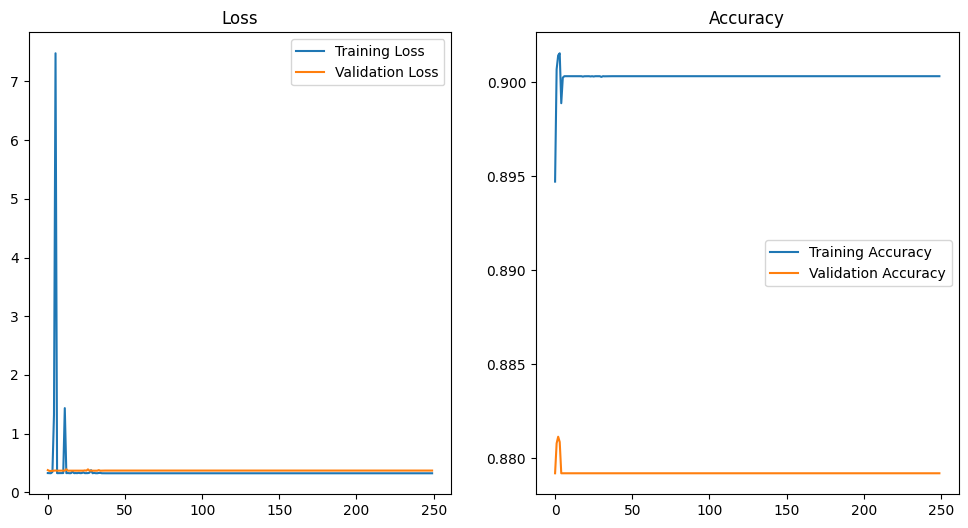

In [17]:
#plotting and saving history of the model
mf.plot_history(history, 'b1_e250_iall_esnon_ad0001_unet_model.png')

In [14]:
resultsv2=mf.calculate_metrics(mask_dataset_val, val_masks_predicted)

In [15]:
resultsv2

{'accuracy': 0.9559551155756391,
 'precision': 0.8922070285979344,
 'recall': 0.7227504831218446,
 'f1_score': 0.7985882678450963,
 'iou': 0.42876008,
 'dice_coefficient': 0.7985882678450963}

In [16]:
with open('b1_e250_adregular_wyniki.txt', 'w') as f:
    f.write("Model Performance Metrics:\n")
    f.write("==========================\n")
    for key, value in resultsv2.items():
        f.write(f"{key}: {value:.4f}\n")
print(f"Metrics saved to {'b1_e250_adregular_wyniki.txt'}")

Metrics saved to b1_e250_adregular_wyniki.txt


In [21]:
conf_matrix=mf.apply_confusion_matrix(mask_dataset_val, val_masks_predicted)

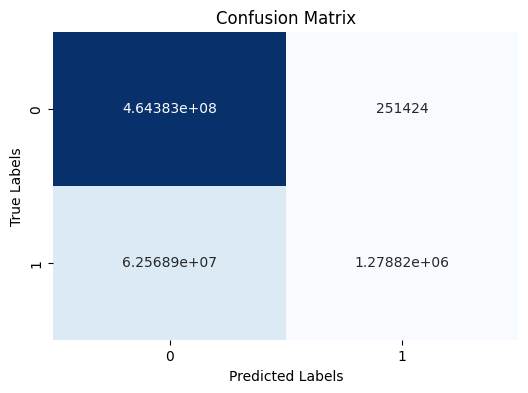

In [22]:
mf.plot_confusion_matrix(conf_matrix, 'b1_e250_iall_esnon_ad0001_conf_matrix.png')

In [23]:
#clearing session
tf.keras.backend.clear_session()